In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.read_excel('./Data/cinema_tickets.xls').sort_values('Дата').head(3)

,Дата,Пользователи,Новые пользователи,Доля новых пользователей,Количество платящих пользователей,Количество платящих пользователей.1,Количество покупок,Количество покупок.1,Количество покупок на платящего пользователя,"Выручка, RUB","Средняя выручка на пользователя, RUB","Средняя выручка на платящего пользователя, RUB",Вернувшиеся,"Выручка, RUB.1","CR воронки покупок, %",Ошибки,CSI
124,2017-08-29,31793,1790,0.056302,1,0.000005,1,0.000002,1.000000,3.991021e-07,0.006291,200.000000,30003,200.0,0,14569,80
123,2017-08-30,21569,1816,0.084195,30,0.000159,31,0.000069,1.033333,3.874284e-05,0.900134,647.166667,19753,19415.0,13,15040,89
122,2017-08-31,23735,2333,0.098294,244,0.001293,268,0.000600,1.098361,3.221692e-04,6.802064,661.668033,21402,161447.0,10,14799,82


In [3]:
df = pd.read_excel('./Data/cinema_tickets.xls').sort_values('Дата').reset_index(drop=True)

df.columns = ['date', 'user', 'user_new', 'rate_user_new', 'paying_user', 'paying_user_hz', 'purchase_number',
       'purchase_number_hz', 'purchase_number_paying_user', 'revenue_hz', 'ARPU', 'ARPPU', 'user_returned',
       'revenue', 'CR_purchase_funnel', 'error_hz', 'CSI']

df.CR_purchase_funnel = df.CR_purchase_funnel / 10000

df = df[['date', 'revenue', 'user', 'user_new', 'user_returned', 'rate_user_new', 
         'paying_user', 'purchase_number', 'purchase_number_paying_user', 
         'ARPU', 'ARPPU', 'CSI', 'CR_purchase_funnel', 'paying_user_hz',  
         'error_hz', 'revenue_hz', 'purchase_number_hz', ]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         125 non-null    datetime64[ns]
 1   revenue                      125 non-null    float64       
 2   user                         125 non-null    int64         
 3   user_new                     125 non-null    int64         
 4   user_returned                125 non-null    int64         
 5   rate_user_new                125 non-null    float64       
 6   paying_user                  125 non-null    int64         
 7   purchase_number              125 non-null    int64         
 8   purchase_number_paying_user  125 non-null    float64       
 9   ARPU                         125 non-null    float64       
 10  ARPPU                        125 non-null    float64       
 11  CSI                          125 non-null    

In [4]:
df.head(3)

,date,revenue,user,user_new,user_returned,rate_user_new,paying_user,purchase_number,purchase_number_paying_user,ARPU,ARPPU,CSI,CR_purchase_funnel,paying_user_hz,error_hz,revenue_hz,purchase_number_hz
0,2017-08-29,200.0,31793,1790,30003,0.056302,1,1,1.000000,0.006291,200.000000,80,0.0000,0.000005,14569,3.991021e-07,0.000002
1,2017-08-30,19415.0,21569,1816,19753,0.084195,30,31,1.033333,0.900134,647.166667,89,0.0013,0.000159,15040,3.874284e-05,0.000069
2,2017-08-31,161447.0,23735,2333,21402,0.098294,244,268,1.098361,6.802064,661.668033,82,0.0010,0.001293,14799,3.221692e-04,0.000600


In [5]:
### user
# user = user_new + returned_user
# revenue = user * ARPU
# rate_user_new = user_new / user
# rate_paying_user = paying_user / user
# rate_returned_user = returned_user / user (1 - rate_user_new)
# purchase_number_paying_user = purchase_number / paying_user
# ARPU = revenue / user
# ARPPU = revenue / paying_user
# CR_purchase_funnel = paying_user / user
# average_check = revenue / purchase_number # AOV (Average Order Value)
# rate_new_churn = (df['user_new'] - df['user_churn']) / df['user']  

In [6]:
# Churn rate — это количество человек, которые прекращают взаимодействие с вашей компанией. 
# Чтобы вычислить отток, нужно разделить количество клиентов, которых вы потеряли, на общее количество клиентов.
# Customer Retention Rate (уровень удержания клиентов) = 1 - Churn rate

df['user_churn'] = (df.user - df['user_returned'].shift(periods=-1, fill_value=0)).shift(periods=1, fill_value=0)
df['churn_rate'] = df['user_churn'] / df['user']

In [7]:
df['rate_paying_user'] = df['paying_user'] /df['user']
df['rate_user_returned'] = df['user_returned'] / df['user']
df['average_check'] = df['revenue'] / df['purchase_number']
df['rate_new_churn'] = (df['user_new'] - df['user_churn']) / df['user']

In [8]:
df.corr()['revenue'][abs(df.corr()['revenue']) > 0.6].sort_values(ascending=False)

revenue               1.000000
revenue_hz            1.000000
ARPU                  0.966441
purchase_number_hz    0.942241
purchase_number       0.942241
paying_user_hz        0.935762
paying_user           0.935762
user_new              0.843391
user                  0.838978
user_returned         0.806211
rate_paying_user      0.803207
ARPPU                 0.801188
average_check         0.781596
Name: revenue, dtype: float64

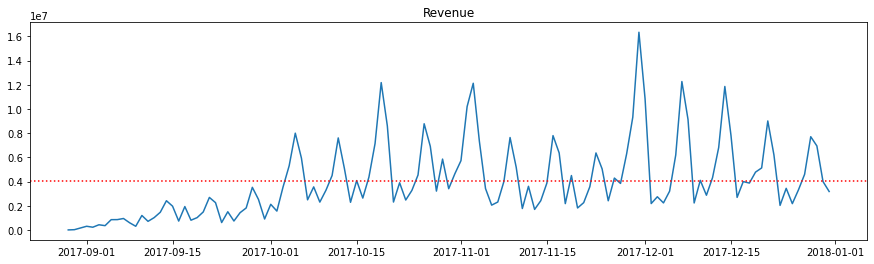

In [9]:
plt.figure(figsize=(15,4))
plt.plot(df.date, df['revenue'])
plt.axhline(np.mean(df['revenue']), c='r', linestyle=':')
plt.title('Revenue');